In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv("../data/TP1_MAM.csv")
df.head()

,Variable,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R13,R14,R15,R16,R17,R18,R19,R20,Averages,Varieances
0,B1,6,7,5,7,4,6,3,6,4,...,7,5,6,4,6,5,4,3,NaN,NaN
1,B2,6,7,7,6,5,4,6,5,4,...,4,3,4,2,1,2,2,3,NaN,NaN
2,B3,4,5,6,3,4,5,3,4,6,...,4,3,5,5,4,4,3,4,NaN,NaN
3,B4,3,2,4,2,2,3,3,3,4,...,2,4,6,3,2,4,3,1,NaN,NaN
4,B5,6,6,7,5,6,6,7,4,5,...,5,4,6,7,5,4,5,7,NaN,NaN


In [2]:
# eliminate warnings
# https://www.geeksforgeeks.org/how-to-disable-python-warnings/#
import warnings

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

In [3]:
df.shape

(95, 23)

In [4]:
df.dtypes

Variable       object
R1              int64
R2              int64
R3              int64
R4              int64
R5              int64
R6              int64
R7              int64
R8              int64
R9              int64
R10             int64
R11             int64
R12             int64
R13             int64
R14             int64
R15             int64
R16             int64
R17             int64
R18             int64
R19             int64
R20             int64
Averages      float64
Varieances    float64
dtype: object

In [5]:
import pandas as pd

flipped_df = df.T

# Now flipped_df has rows and columns switched
# Print the transposed DataFrame
print(flipped_df)


             0    1    2    3    4    5    6    7    8    9   ...   85   86  \
Variable     B1   B2   B3   B4   B5   B6   B7   B8   B9  B10  ...   D6   D7   
R1            6    6    4    3    6    4    5    2    2    7  ...    4    6   
R2            7    7    5    2    6    5    4    3    3    7  ...    2    5   
R3            5    7    6    4    7    6    4    5    1    7  ...    4    4   
R4            7    6    3    2    5    5    4    3    2    7  ...    5    6   
R5            4    5    4    2    6    5    5    3    3    7  ...    3    6   
R6            6    4    5    3    6    3    5    1    2    7  ...    2    2   
R7            3    6    3    3    7    2    4    2    2    7  ...    4    4   
R8            6    5    4    3    4    4    4    3    4    7  ...    4    3   
R9            4    4    6    4    5    3    6    2    3    7  ...    5    5   
R10           5    2    4    3    5    6    7    1    5    7  ...    6    4   
R11           6    5    3    2    7    6    4    1  

In [6]:
df_transposed = pd.read_csv('../data/TP1_MAM.csv', index_col=0)
# Transpose to have variables in columns
df = df_transposed.T

In [7]:
df.head

<bound method NDFrame.head of Variable     B1   B2   B3   B4   B5   B6   B7   B8   B9  B10  ...   D6   D7  \
R1          6.0  6.0  4.0  3.0  6.0  4.0  5.0  2.0  2.0  7.0  ...  4.0  6.0   
R2          7.0  7.0  5.0  2.0  6.0  5.0  4.0  3.0  3.0  7.0  ...  2.0  5.0   
R3          5.0  7.0  6.0  4.0  7.0  6.0  4.0  5.0  1.0  7.0  ...  4.0  4.0   
R4          7.0  6.0  3.0  2.0  5.0  5.0  4.0  3.0  2.0  7.0  ...  5.0  6.0   
R5          4.0  5.0  4.0  2.0  6.0  5.0  5.0  3.0  3.0  7.0  ...  3.0  6.0   
R6          6.0  4.0  5.0  3.0  6.0  3.0  5.0  1.0  2.0  7.0  ...  2.0  2.0   
R7          3.0  6.0  3.0  3.0  7.0  2.0  4.0  2.0  2.0  7.0  ...  4.0  4.0   
R8          6.0  5.0  4.0  3.0  4.0  4.0  4.0  3.0  4.0  7.0  ...  4.0  3.0   
R9          4.0  4.0  6.0  4.0  5.0  3.0  6.0  2.0  3.0  7.0  ...  5.0  5.0   
R10         5.0  2.0  4.0  3.0  5.0  6.0  7.0  1.0  5.0  7.0  ...  6.0  4.0   
R11         6.0  5.0  3.0  2.0  7.0  6.0  4.0  1.0  3.0  7.0  ...  2.0  7.0   
R12         7.0  5.0  

Variable            I1        I2        I3        I4        I5        I6  \
Variable                                                                   
I1        1.000000e+00 -0.373741 -0.311155 -0.031468  0.147623  0.336795   
I2       -3.737412e-01  1.000000  0.403972 -0.063338  0.023907 -0.054965   
I3       -3.111549e-01  0.403972  1.000000  0.183152 -0.021455 -0.169902   
I4       -3.146757e-02 -0.063338  0.183152  1.000000  0.533040 -0.483695   
I5        1.476233e-01  0.023907 -0.021455  0.533040  1.000000 -0.089753   
I6        3.367953e-01 -0.054965 -0.169902 -0.483695 -0.089753  1.000000   
I7        5.090459e-03  0.249321  0.144055  0.421659  0.698842 -0.048329   
I8        1.883236e-01  0.194794  0.250404  0.147165  0.351147  0.180923   
I9        1.879447e-02  0.365685  0.215009  0.146868  0.242338  0.178434   
I10       2.501353e-01 -0.319195 -0.215576 -0.475253 -0.517086  0.552120   
D1       -2.008590e-01  0.148018  0.739508  0.138948 -0.252247 -0.326013   
D2       -3.

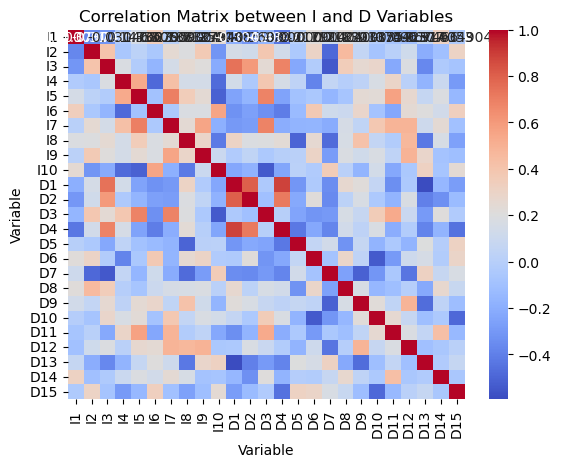

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15']].corr()

print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt="1f")
plt.title('Correlation Matrix between I and D Variables')
plt.show()
